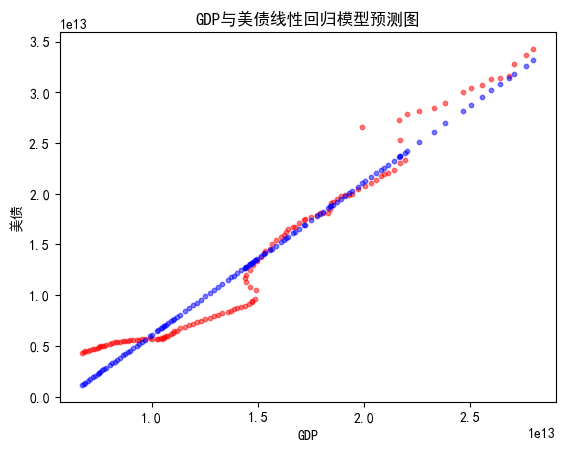

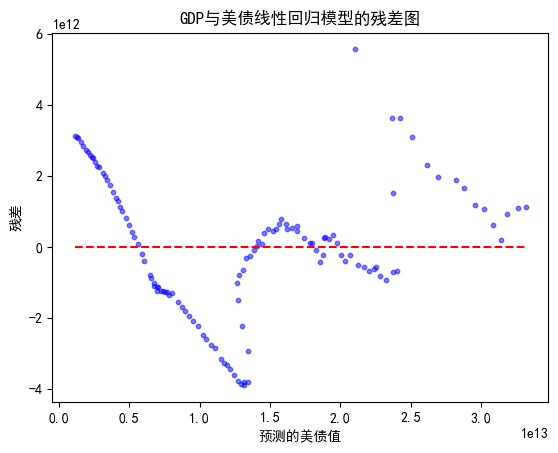

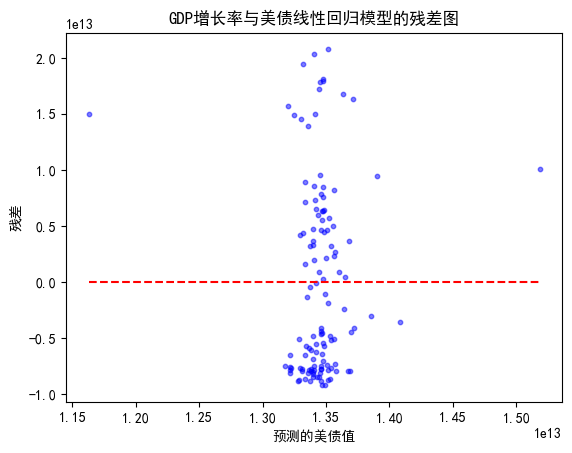

In [ ]:
# 绘制GDP与美债的线性回归模型残差图
X = df['GDP']
y = df['美债']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X).fit()
# 绘制预测图像与原始图像的对比散点图
plt.scatter(df['GDP'], df['美债'], s=10, c='r', alpha=0.5)
plt.scatter(df['GDP'], model.predict(), s=10, c='b', alpha=0.5)
plt.xlabel('GDP')
plt.ylabel('美债')
plt.title('GDP与美债线性回归模型预测图')
plt.show()


residuals = model.resid
plt.scatter(model.predict(), residuals, color='blue', s=10, alpha=0.5)
plt.hlines(y=0, xmin=min(model.predict()), xmax=max(model.predict()), colors='r', linestyles='--')
plt.xlabel('预测的美债值')
plt.ylabel('残差')
plt.title('GDP与美债线性回归模型的残差图')
plt.show()
# 绘制GDP增长率与美债的线性回归模型残差图
X = df['GDP增长率']
y = df['美债']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X).fit()
residuals = model.resid
plt.scatter(model.predict(), residuals, color='blue', s=10, alpha=0.5)
plt.hlines(y=0, xmin=min(model.predict()), xmax=max(model.predict()), colors='r', linestyles='--')
plt.xlabel('预测的美债值')
plt.ylabel('残差')
plt.title('GDP增长率与美债线性回归模型的残差图')
plt.show()

          GDP增长率       GDP        美债
GDP增长率  1.000000 -0.096718 -0.031030
GDP    -0.096718  1.000000  0.975361
美债     -0.031030  0.975361  1.000000


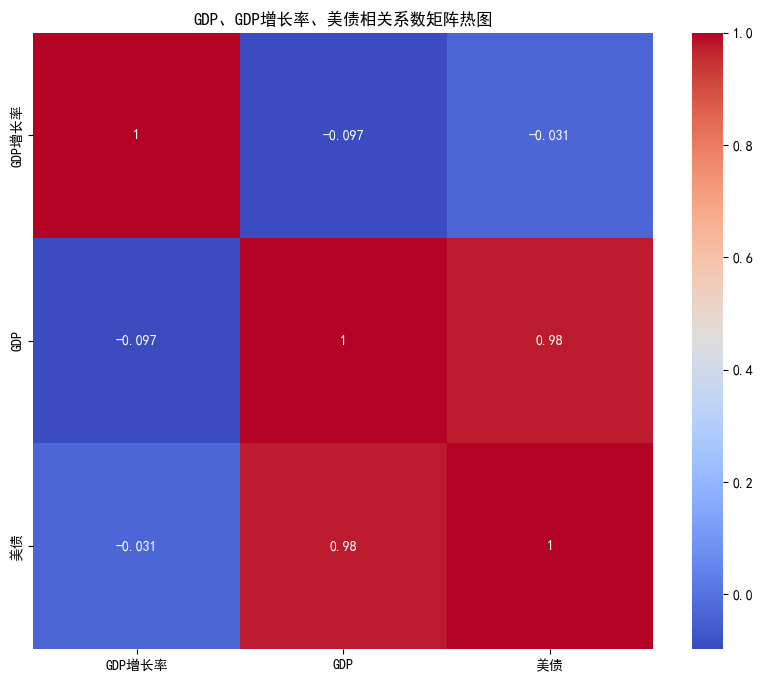

GDP与美债的R方值: 0.9513284792209876
GDP增长率与美债的R方值: 0.0009628834227642935
GDP与GDP增长率的R方值: 0.00935445684444336


In [ ]:
# 绘制相关系数矩阵热图
corr = df.corr()
print(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('GDP、GDP增长率、美债相关系数矩阵热图')
plt.show()

variables = [('GDP', '美债'), ('GDP增长率', '美债'), ('GDP', 'GDP增长率')]
for x_var, y_var in variables:
    X = df[x_var]
    y = df[y_var]
    X = sm.add_constant(X)  # 添加常数项
    model = sm.OLS(y, X).fit()
    print(f"{x_var}与{y_var}的R方值:", model.rsquared)

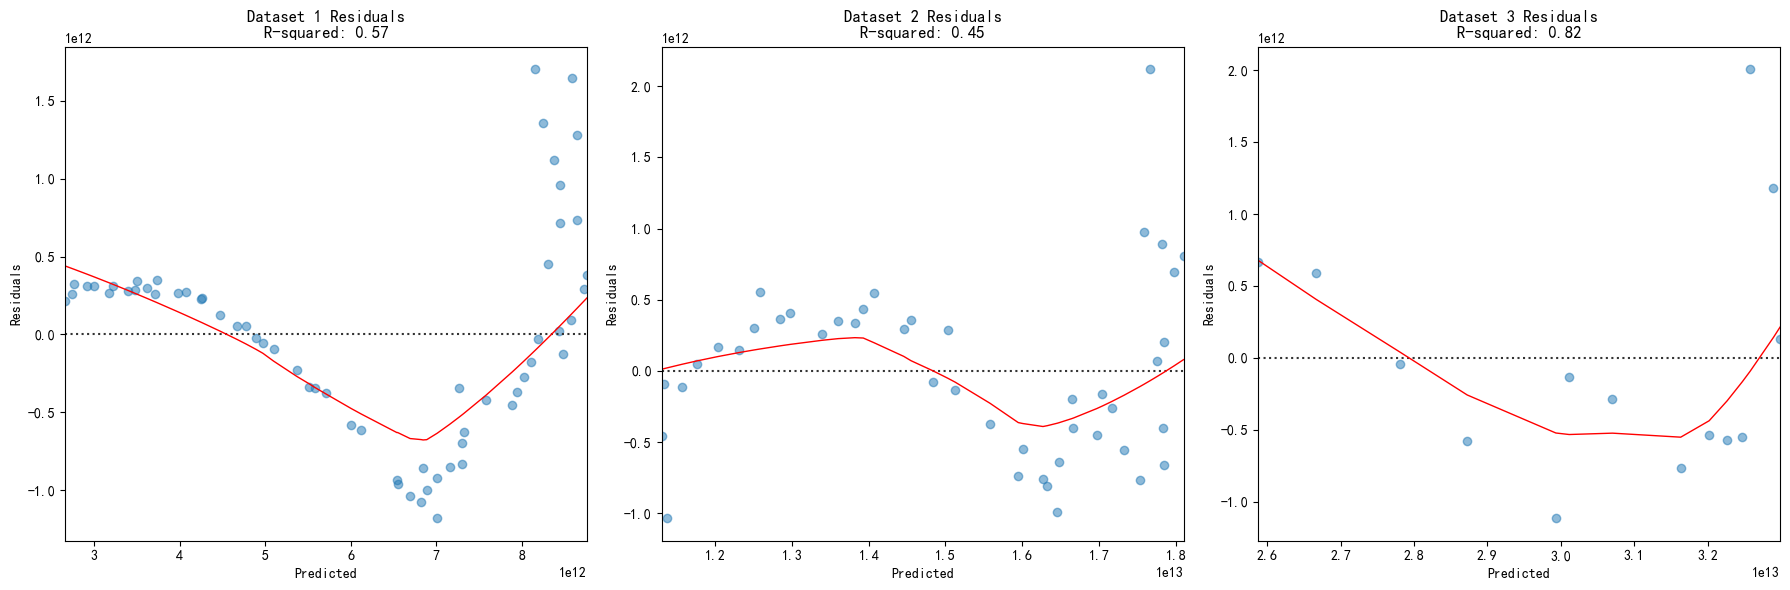

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import numpy as np

# 设置图形大小
plt.figure(figsize=(18, 6))

for i, df in enumerate(dfs, start=1):
    # 定义自变量和因变量
    X = df[['GDP', 'GDP增长率']]
    y = df['美债']
    
    # 添加二次项特征
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X_poly)  
    # 添加常数项
    X_poly = sm.add_constant(X_poly)
    
    # 构建多项式回归模型
    model_poly = sm.OLS(y, X_poly).fit()
    
    # 获取模型的预测值
    predictions_poly = model_poly.predict(X_poly)
    
    # 计算残差
    residuals_poly = y - predictions_poly
    
    # 绘制残差图
    plt.subplot(1, 3, i)
    sns.residplot(x=predictions_poly, y=residuals_poly, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color': 'red', 'lw': 1})
    plt.title(f'Dataset {i} Residuals\nR-squared: {model_poly.rsquared:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

C:\Users\Timothy\AppData\Local\Temp\ipykernel_11472\3250508788.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X['GDP'][sorted_index], predictions[sorted_index], color=colors[i-1], label=f'{labels[i-1]} Prediction')
C:\Users\Timothy\AppData\Local\Temp\ipykernel_11472\3250508788.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X['GDP'][sorted_index], predictions[sorted_index], color=colors[i-1], label=f'{labels[i-1]} Prediction')
C:\Users\Timothy\AppData\Local\Temp\ipykernel_11472\3250508788.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

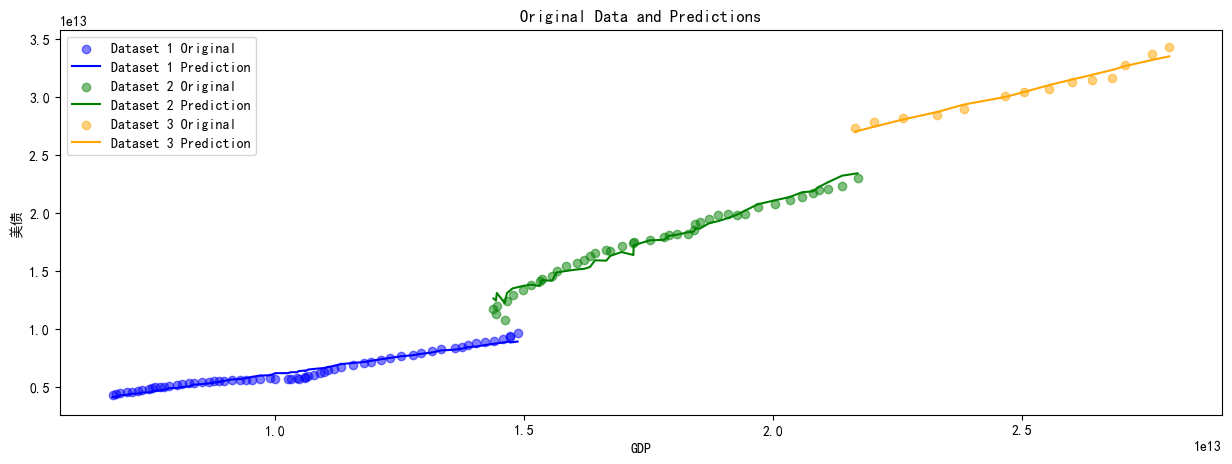

In [ ]:
plt.figure(figsize=(15, 5))

colors = ['blue', 'green', 'orange']  # 为每个数据集定义不同的颜色
labels = ['Dataset 1', 'Dataset 2', 'Dataset 3']  # 数据集标签

for i, df in enumerate(dfs, 1):
    X = df[['GDP', 'GDP增长率']]
    y = df['美债']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    # 绘制原始数据的散点图
    plt.scatter(df['GDP'], y, color=colors[i-1], alpha=0.5, label=f'{labels[i-1]} Original')
    
    # 为了绘制预测线，需要对GDP进行排序
    sorted_index = X['GDP'].argsort()
    plt.plot(X['GDP'][sorted_index], predictions[sorted_index], color=colors[i-1], label=f'{labels[i-1]} Prediction')

plt.title('Original Data and Predictions')
plt.xlabel('GDP')
plt.ylabel('美债')
plt.legend()
plt.show()

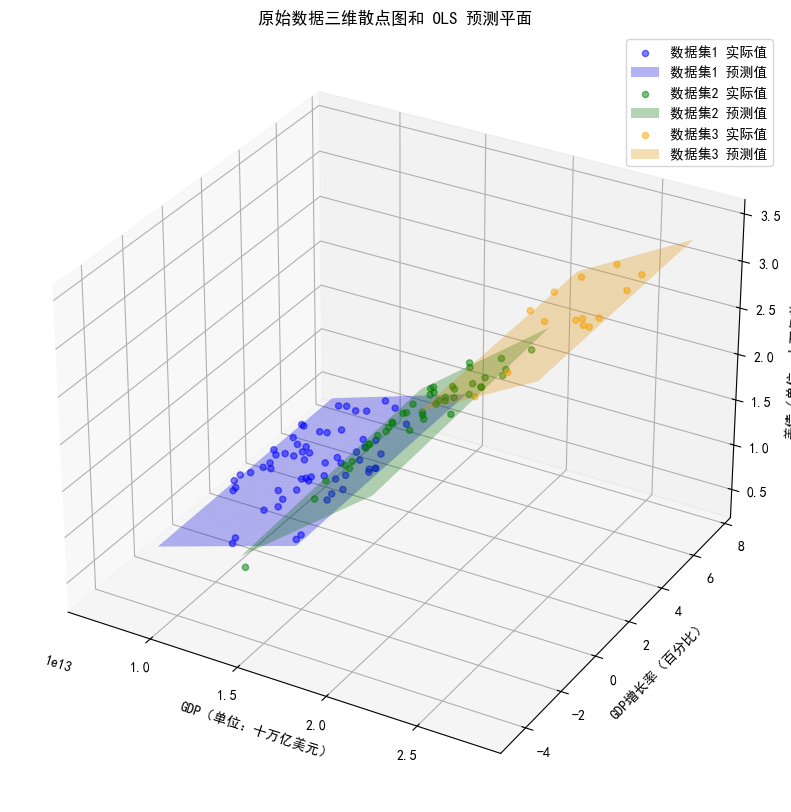

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'green', 'orange']  # 为每个数据集定义不同的颜色
labels = ['数据集1', '数据集2', '数据集3']  # 数据集标签

for i, dfi in enumerate(dfs, 1):
    X = dfi[['GDP', 'GDP增长率']]
    y = dfi['美债']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # 绘制原始数据的散点图
    ax.scatter(dfi['GDP'], dfi['GDP增长率'], dfi['美债'], color=colors[i-1], alpha=0.5, label=f'{labels[i-1]} 实际值')
    
    # 计算预测直线
    # 由于是3D空间中的直线，我们需要定义一个足够长的GDP范围来覆盖数据点
    gdp_range = np.linspace(dfi['GDP'].min(), dfi['GDP'].max(), 100)
    gdp_growth_range = np.linspace(dfi['GDP增长率'].min(), dfi['GDP增长率'].max(), 100)
    # 生成所有可能的GDP和GDP增长率组合
    XX, YY = np.meshgrid(gdp_range, gdp_growth_range)
    ZZ = model.params.iloc[0] + model.params.iloc[1] * XX + model.params.iloc[2] * YY
    
    # 绘制预测平面
    ax.plot_surface(XX, YY, ZZ, color=colors[i-1], alpha=0.3, label=f'{labels[i-1]} 预测值')

ax.set_title('原始数据三维散点图和 OLS 预测平面')
ax.set_xlabel('GDP（单位：十万亿美元）')
ax.set_ylabel('GDP增长率（百分比）')
ax.set_zlabel('美债（单位：十万亿美元）')
ax.legend()

plt.show()

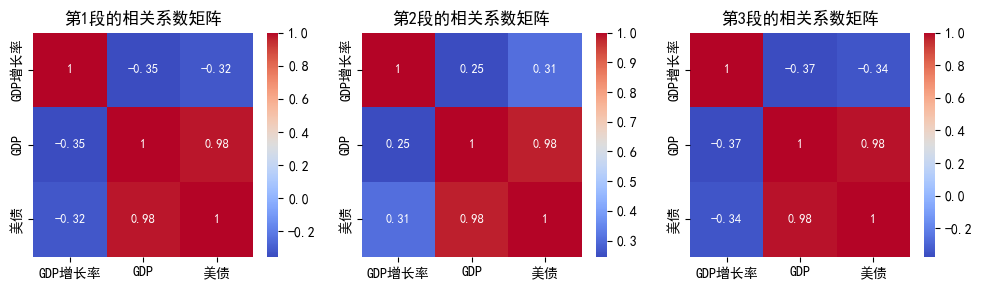

In [ ]:
corrs = [df_1.corr(), df_2.corr(), df_3.corr()]
# 绘制热图
plt.figure(figsize=(10, 3))
for i in enumerate(corrs):
    plt.subplot(1, 3, i[0]+1)
    sns.heatmap(i[1], annot=True, cmap='coolwarm', annot_kws={'size': 9})
    plt.title(f'第{i[0]+1}段的相关系数矩阵')
plt.tight_layout()  # 调整子图间距
plt.show()

1
const   -3.504216e+11
x1       5.959352e-01
x2       2.924070e+11
x3       9.332796e+10
x4      -8.985348e+10
x5       1.910838e+10
x6      -1.263447e+09
dtype: float64


2
const    5.466529e-66
x1       1.495026e-28
x2       8.735858e-40
x3       7.898748e-27
x4      -2.634399e-40
x5       7.893735e-66
dtype: float64


3
const    3.173215e+12
x1       1.091301e+00
x2      -1.410458e+11
x3      -3.430055e+10
x4       2.539091e+10
x5       9.693020e+07
x6      -3.901742e+08
dtype: float64




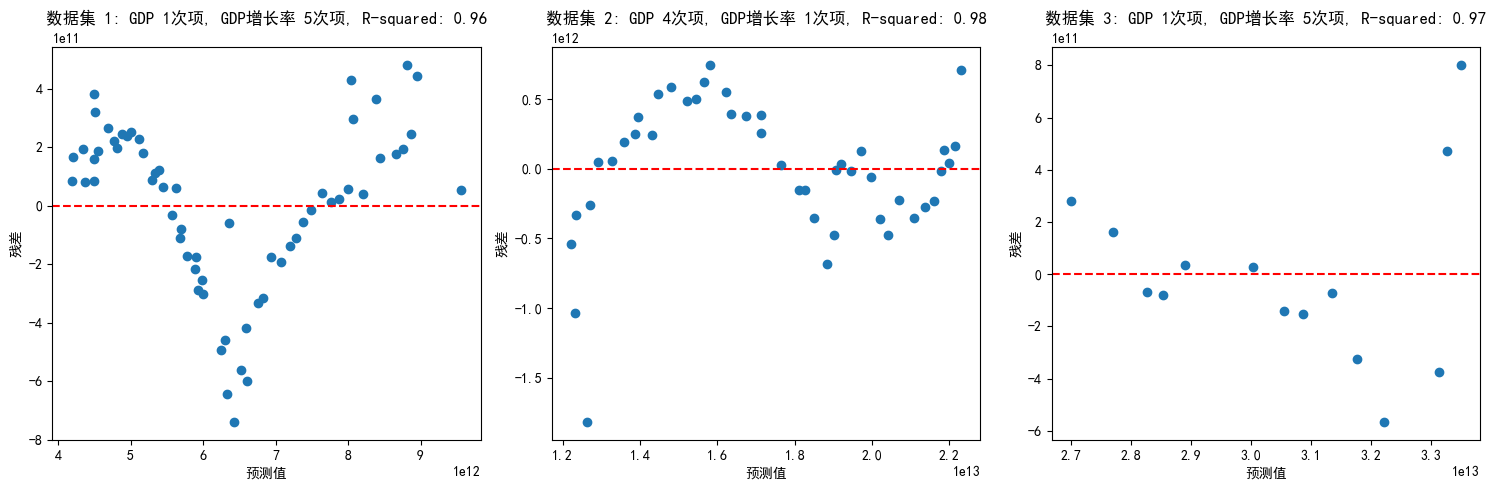

In [ ]:
# 设置图形大小
plt.figure(figsize=(15, 5))

for i in range(3):
    # 找到R方值最大的点的索引
    max_r_squared_index = np.unravel_index(np.argmax(r_squared_values[:, :, i]), r_squared_values[:, :, i].shape)
    degree_gdp, degree_growth = max_r_squared_index
    
    # 重新构建对应的多项式回归模型
    X = dfs[i][['GDP', 'GDP增长率']]
    y = dfs[i]['美债']
    
    poly_gdp = PolynomialFeatures(degree=degree_gdp + 1, include_bias=False)
    poly_growth = PolynomialFeatures(degree=degree_growth + 1, include_bias=False)
    
    X_gdp_poly = poly_gdp.fit_transform(X[['GDP']])
    X_growth_poly = poly_growth.fit_transform(X[['GDP增长率']])
    
    X_poly = np.concatenate((X_gdp_poly, X_growth_poly), axis=1)
    X_poly = sm.add_constant(X_poly)
    
    model_poly = sm.OLS(y, X_poly).fit()
    
    # 绘制残差图
    plt.subplot(1, 3, i + 1)
    plt.scatter(model_poly.fittedvalues, model_poly.resid)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('预测值')
    plt.ylabel('残差')
    plt.title(f'数据集 {i+1}: GDP {degree_gdp + 1}次项, GDP增长率 {degree_growth + 1}次项, R-squared: {model_poly.rsquared:.2f}')
    

plt.tight_layout()
plt.show()

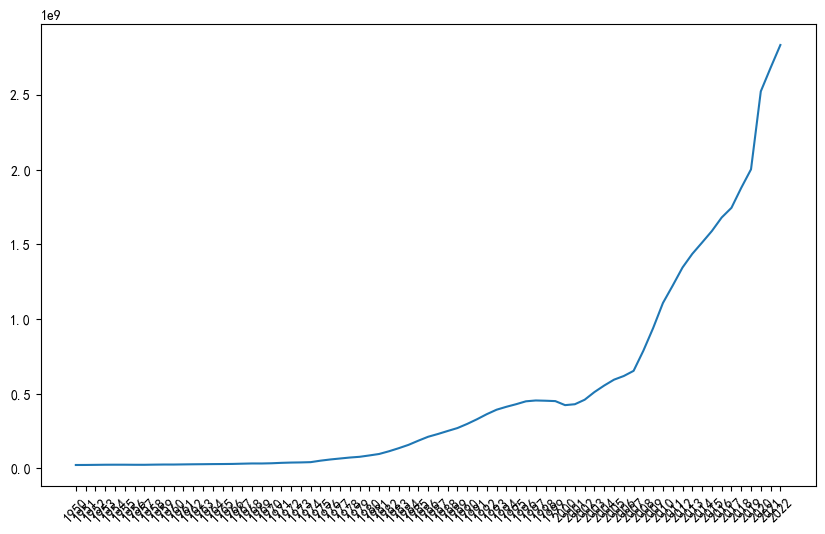

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df2.columns, df2.iloc[2]*df2.iloc[1])
plt.xticks(rotation=45)

plt.show()

#### 2-1预测平面绘制.py

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

# 获取当前文件的完整路径
current_file_path = __file__

# 获取当前文件所在目录的路径
current_dir = os.path.dirname(current_file_path)

# 改变当前工作目录
os.chdir(current_dir)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('GDP、GDP增长率、美债.xlsx')
# 定义转换函数
def quarter_to_date(quarter_str):
    year, quarter = quarter_str.split('年')
    quarter_dict = {"第一季度": "03-31", "第二季度": "06-30", "第三季度": "09-30", "第四季度": "12-31"}
    return pd.to_datetime(f"{year}-{quarter_dict[quarter]}")
columns = df.columns
new_columns = [quarter_to_date(col) for col in columns]
df.columns = new_columns
df = df.T
df.columns = ['GDP增长率', 'GDP', '美债']
df_1 = df[df.index <= '2008-09-30']
df_2 = df[(df.index >= '2009-03-31') & (df.index <= '2019-12-31')]
df_3 = df[df.index >= '2020-12-31']
dfs = [df_1, df_2, df_3]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'green', 'orange']  # 为每个数据集定义不同的颜色
labels = ['数据集1', '数据集2', '数据集3']  # 数据集标签

for i, dfi in enumerate(dfs, 1):
    X = dfi[['GDP', 'GDP增长率']]
    y = dfi['美债']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # 绘制原始数据的散点图
    ax.scatter(dfi['GDP'], dfi['GDP增长率'], dfi['美债'], color=colors[i-1], alpha=0.5, label=f'{labels[i-1]} 实际值')
    
    # 计算预测直线
    # 由于是3D空间中的直线，我们需要定义一个足够长的GDP范围来覆盖数据点
    gdp_range = np.linspace(dfi['GDP'].min(), dfi['GDP'].max(), 100)
    gdp_growth_range = np.linspace(dfi['GDP增长率'].min(), dfi['GDP增长率'].max(), 100)
    # 生成所有可能的GDP和GDP增长率组合
    XX, YY = np.meshgrid(gdp_range, gdp_growth_range)
    ZZ = model.params.iloc[0] + model.params.iloc[1] * XX + model.params.iloc[2] * YY
    
    # 绘制预测平面
    ax.plot_surface(XX, YY, ZZ, color=colors[i-1], alpha=0.3, label=f'{labels[i-1]} 预测值')

ax.set_title('原始数据三维散点图和 OLS 预测平面')
ax.set_xlabel('GDP（单位：十万亿美元）')
ax.set_ylabel('GDP增长率（百分比）')
ax.set_zlabel('美债（单位：十万亿美元）')
ax.legend()

plt.show()

#### 2-2.ipynb   的绝大部分

In [ ]:
# 使用 df3.describe() 获取描述性统计结果
desc_stats = df3.describe()

# 选择需要的统计量
selected_stats = desc_stats.loc[['count', 'mean', 'std', 'min', 'max']]

# 转置 DataFrame，使原来的列标成为行标
result_matrix = selected_stats.T
result_matrix.columns = ['样本量', '均值', '标准差', '最小值', '最大值']
# 打印结果矩阵
print(result_matrix)
result_matrix.to_excel('描述性统计.xlsx')

                样本量          均值        标准差        最小值         最大值
对数人均GDP        61.0    9.868073   0.964479   8.025896   11.171222
人口增长率/%        61.0    0.997713   0.253990   0.157343    1.657730
总储蓄率/%         61.0    3.644496   2.300913  -1.281581    8.594601
私人信贷占GDP百分比/%  61.0  133.353047  44.968261  75.261783  221.129332
老年抚养比/%        61.0   18.406895   2.366972  15.575261   25.629057


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 假设 df3 是已经存在的 DataFrame

# 结果存储的字典
results = {"ADF值": [], "p值": [], "结论": []}

# 对 df3 的每一列进行 ADF 测试
for column in df3.columns:
    adf_result = adfuller(df3[column])
    adf_value = adf_result[0]
    p_value = adf_result[1]
    conclusion = "平稳" if p_value < 0.05 else "不平稳"
    
    # 将结果添加到字典中
    results["ADF值"].append(adf_value)
    results["p值"].append(p_value)
    results["结论"].append(conclusion)

# 将结果字典转换为 DataFrame
results_df = pd.DataFrame(results, index=df3.columns)

# 打印结果表格
print(results_df)

df3_diff_diff = df3.diff().dropna().diff().dropna()
results = {"ADF值": [], "p值": [], "结论": []}
# 结果存储的字典
for column in df3_diff_diff.columns:
    adf_result = adfuller(df3_diff_diff[column])
    adf_value = adf_result[0]
    p_value = adf_result[1]
    conclusion = "平稳" if p_value < 0.05 else "不平稳"
    
    # 将结果添加到字典中
    results["ADF值"].append(adf_value)
    results["p值"].append(p_value)
    results["结论"].append(conclusion)
results_df_diff = pd.DataFrame(results, index=df3_diff_diff.columns)
print(results_df_diff)

                   ADF值        p值   结论
人均GDP/现价美元     4.537880  1.000000  不平稳
人口增长率/%       -1.691634  0.435428  不平稳
总储蓄率/%        -1.980517  0.295181  不平稳
私人信贷占GDP百分比/%  0.462277  0.983680  不平稳
老年抚养比/%        1.358790  0.996919  不平稳
                   ADF值            p值   结论
人均GDP/现价美元    -1.696441  4.329469e-01  不平稳
人口增长率/%       -5.067595  1.628214e-05   平稳
总储蓄率/%        -8.691137  4.037722e-14   平稳
私人信贷占GDP百分比/% -2.607015  9.155603e-02  不平稳
老年抚养比/%       -3.408326  1.067830e-02   平稳


In [ ]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

# 假设df是已经准备好的面板数据，其中'individual'是个体标识符，'time'是时间标识符
# 'dependent_var'是因变量，'independent_var1', 'independent_var2'是自变量

# 将数据转换为MultiIndex格式，这是PanelOLS所需的格式
df = df.set_index(['individual', 'time'])

# 创建模型，这里'EntityEffects'表示使用固定效应
mod = PanelOLS.from_formula('dependent_var ~ independent_var1 + independent_var2 + EntityEffects', data=df)

# 拟合模型
res = mod.fit()

# 打印结果
print(res)

KeyError: "None of ['individual', 'time'] are in the columns"